<a href="https://colab.research.google.com/github/arinaaandreeva/Datasets/blob/main/regularization_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регуляризация

# План занятия

1. Регуляризация для задачи регрессии с помощью Sklearn
    - Ridge (L2 регуляризация)
    - Lasso (L1 регуляризация)
    - Elastic Net (L1 + L2)
2. Регуляризация для задачи классификации с помощью Sklearn
    - L2 регуляризация
    - L1 регуляризация
    - Elastic Net (L1 + L2)
3. Визуализация весов при изменении коэффициента регуляризации
4. Визуализация разделяющей плоскости для классификации

# Что нужно знать перед занятием


1. Регуляризация. Теория - https://youtu.be/4WcHxtYy3_8
2. Линейная регрессия - https://youtu.be/KJA9A1q9l7E 
2. Логистическая регрессия - https://youtu.be/ruVK07YF-RU



# Курс по библиотекам машинного обучения

✏️ https://stepik.org/a/129105

- 12 практических заданий
- Тесты после занятий
- Проект на выбор

С промокодом **JULIA_ML** скидка 50% до 31.12.2022

Успевайте!



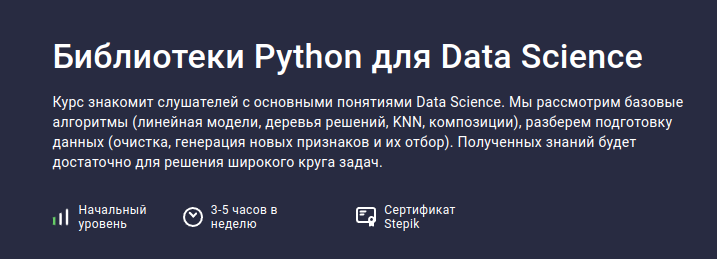

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Регрессия

Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [ ]:
import numpy as np

In [ ]:
def f(x):
    return 0.4 + 2 * x + 0.8 * x ** 2 + 0.5 * x ** 3

In [ ]:
X = np.linspace(-5, 5, 100)
y = f(X)

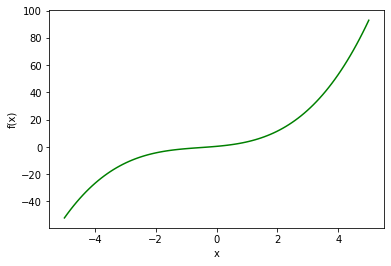

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g');

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [ ]:
np.random.seed(18)
x_train = np.random.uniform(-5, 5, 10)
y_train = f(x_train) + 10 * np.random.randn(10)

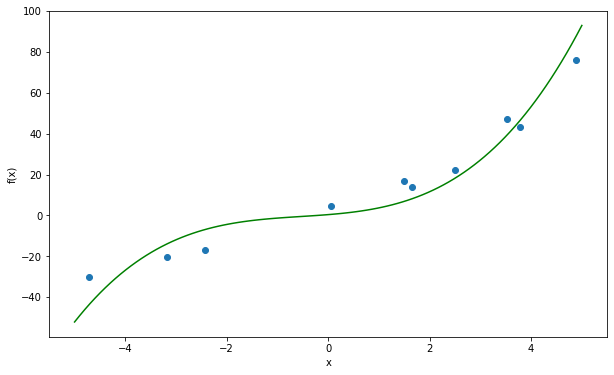

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');

In [ ]:
np.random.seed(8)
x_test = np.random.uniform(-5, 5, 10)
x_test = np.sort(x_test)
y_test = f(x_test)

X_test = x_test.reshape(-1, 1)
X_train = x_train.reshape(-1, 1)

X_train.shape

(10, 1)

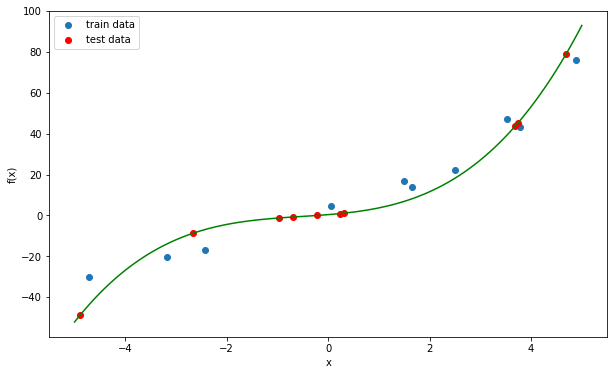

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend();

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False), 
                     StandardScaler())

pipe.fit(X_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train

array([[ 0.24280024, -0.99361672, -0.09514354, -0.7935088 , -0.11704045,
        -0.65377906, -0.10644533, -0.5794457 , -0.1009462 , -0.53869339,
        -0.10204173],
       [-0.22897903, -1.2831795 , -0.15708267, -0.81953153, -0.1235608 ,
        -0.65623629, -0.10709649, -0.57968053, -0.1010101 , -0.53871595,
        -0.10204796],
       [ 0.98577727,  0.55438194,  0.83149569,  0.2261249 ,  0.5360912 ,
        -0.03034556,  0.3104915 , -0.2005174 ,  0.15876023, -0.30782378,
         0.05845399],
       [-1.28247793,  0.01438908, -0.74376567, -0.29804765, -0.40001917,
        -0.43580342, -0.23068805, -0.48537658, -0.15530466, -0.49816146,
        -0.1257384 ],
       [ 0.89993686,  0.30728335,  0.63899286, -0.03613738,  0.33622339,
        -0.25036765,  0.1448352 , -0.36686234,  0.03463997, -0.42654316,
        -0.02950314],
       [ 0.56756827, -0.4812904 ,  0.12801331, -0.62029612, -0.04052089,
        -0.60418099, -0.08415039, -0.56591537, -0.09477937, -0.53505703,
        -0.100

## Ridge (L2 регуляризация)

In [ ]:
alphas = list(np.logspace(-7, 4, 10))
models = []
coefs = []

In [ ]:
alphas

[1e-07,
 1.6681005372000591e-06,
 2.782559402207126e-05,
 0.0004641588833612782,
 0.007742636826811277,
 0.12915496650148853,
 2.1544346900318865,
 35.9381366380464,
 599.4842503189421,
 10000.0]

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression

for alpha in alphas:
    m_r = Ridge(alpha=alpha).fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(X_train, y_train))

In [ ]:
len(models)

11

In [ ]:
len(coefs)

10

In [ ]:
coefs[0].shape

(11,)

### Визуализация предсказаний

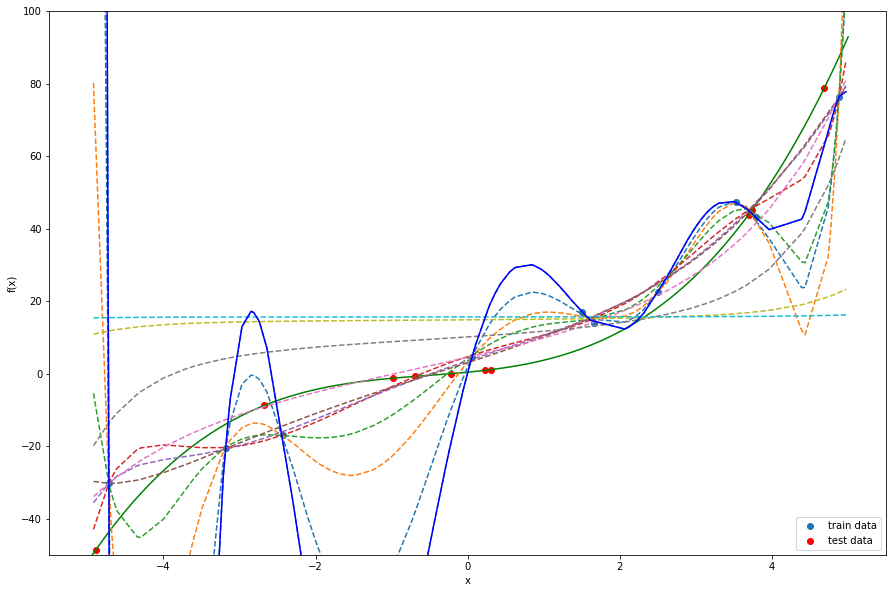

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_r2,test_r2
0,no,1.000000,-76.478993
1,0.0,0.999901,-18.170492
2,0.000002,0.999682,-0.349948
3,0.000028,0.998399,0.719186
4,0.000464,0.995018,0.956577
5,0.007743,0.993622,0.963986
6,0.129155,0.992731,0.954618
7,2.154435,0.970881,0.960356
8,35.938137,0.732147,0.720257
9,599.48425,0.142472,0.114558


### Визуализация весов

In [ ]:
coefs

[array([  149.8238576 ,  -188.61880162,  -638.45876489,  1329.80231047,
          955.35361249, -2215.00766652,  -159.53960494,    57.27586056,
          482.22294723,  1081.87557073,  -810.4256577 ]),
 array([  78.31410566,  -62.67152812, -339.25446742,  382.46790669,
         742.72170377, -431.55413298, -335.21023174, -382.42626281,
        -382.51457226,  510.87165297,  254.02881787]),
 array([  45.62849492,  -31.6193098 , -145.44957292,  172.34440858,
         368.74840902, -139.84811579, -204.13869274, -237.35682325,
        -251.07555874,  244.52828471,  213.1847012 ]),
 array([ 21.15973629, -11.37561335,  13.68268036,  50.3946268 ,
         16.09421097, -24.34974542, -44.37402771, -39.12186706,
        -25.95267197,  29.29724161,  50.99279805]),
 array([22.03232612, -3.01419069, 10.6719799 , 15.46258483, -1.59271275,
         0.11794318, -5.60510862, -5.22228425, -1.14986485, -1.14624965,
         6.95663351]),
 array([20.96601954,  1.26460612,  9.14300246,  3.76663401,  2.8007

In [ ]:
np.vstack(coefs).T

array([[ 1.49823858e+02,  7.83141057e+01,  4.56284949e+01,
         2.11597363e+01,  2.20323261e+01,  2.09660195e+01,
         1.49750038e+01,  4.26591103e+00,  4.73603858e-01,
         3.03610593e-02],
       [-1.88618802e+02, -6.26715281e+01, -3.16193098e+01,
        -1.13756134e+01, -3.01419069e+00,  1.26460612e+00,
         2.26184976e+00,  8.87314879e-01,  1.31114101e-01,
         8.74394708e-03],
       [-6.38458765e+02, -3.39254467e+02, -1.45449573e+02,
         1.36826804e+01,  1.06719799e+01,  9.14300246e+00,
         7.98551751e+00,  3.52717770e+00,  4.59046049e-01,
         2.98237041e-02],
       [ 1.32980231e+03,  3.82467907e+02,  1.72344409e+02,
         5.03946268e+01,  1.54625848e+01,  3.76663401e+00,
         1.94397342e+00,  7.91030097e-01,  1.31334026e-01,
         8.83262366e-03],
       [ 9.55353612e+02,  7.42721704e+02,  3.68748409e+02,
         1.60942110e+01, -1.59271275e+00,  2.80075149e+00,
         3.77953349e+00,  2.89988418e+00,  4.22648749e-01,
         2.

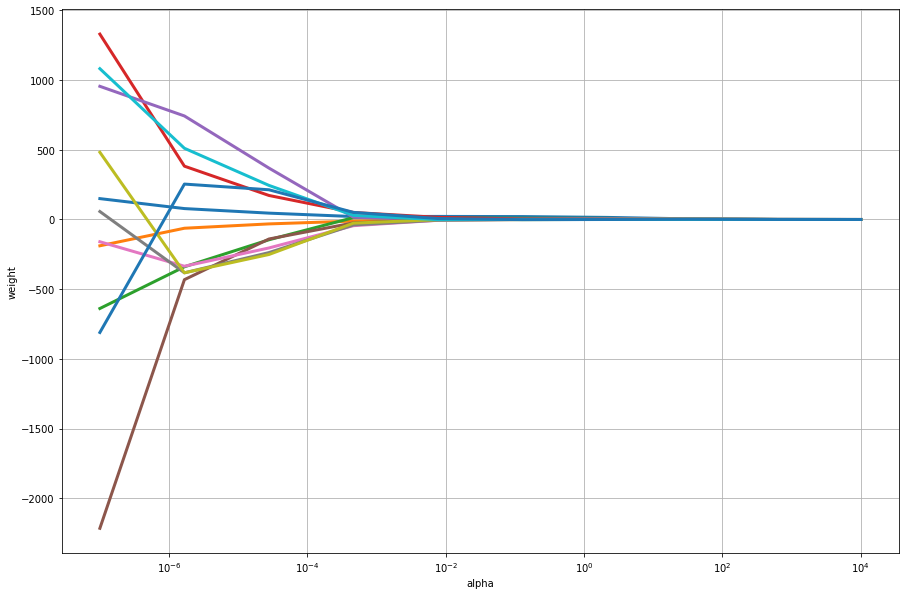

In [ ]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

## Lasso (L1 регуляризация)

In [ ]:
alphas = list(np.logspace(-3, 2, 10))
models = []
coefs = []

In [ ]:
alphas

[0.001,
 0.003593813663804626,
 0.01291549665014884,
 0.046415888336127795,
 0.1668100537200059,
 0.5994842503189409,
 2.1544346900318843,
 7.742636826811277,
 27.825594022071257,
 100.0]

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression

for alpha in alphas:
    m_r = Lasso(alpha=alpha).fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LinearRegression().fit(X_train, y_train))

### Визуализация предсказаний

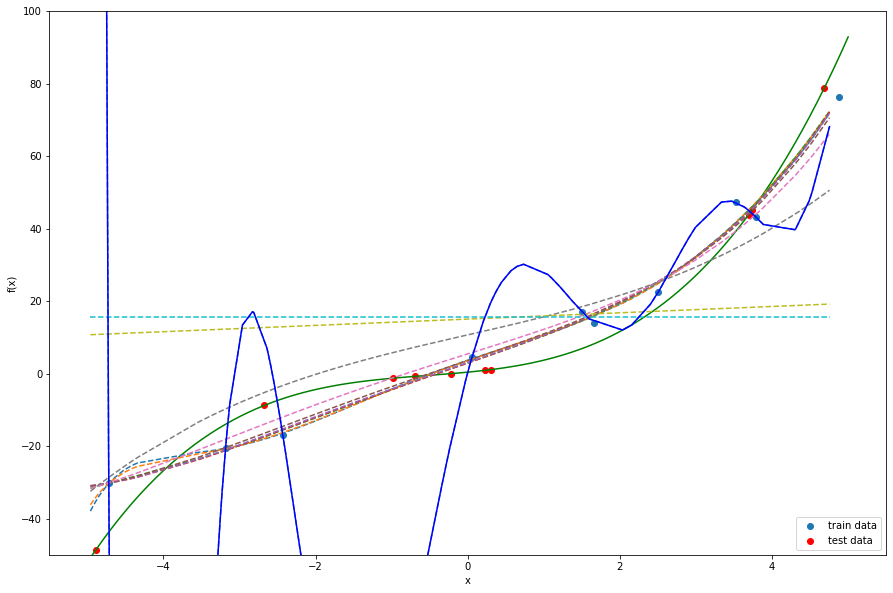

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_r2,test_r2
0,no,1.000000,-76.478993
1,0.001,0.993779,0.964088
2,0.003594,0.993632,0.962608
3,0.012915,0.993179,0.956604
4,0.046416,0.993016,0.954939
5,0.16681,0.992967,0.954717
6,0.599484,0.992329,0.953459
7,2.154435,0.984108,0.943561
8,7.742637,0.887044,0.847440
9,27.825594,0.154763,0.120156


### Визуализация весов

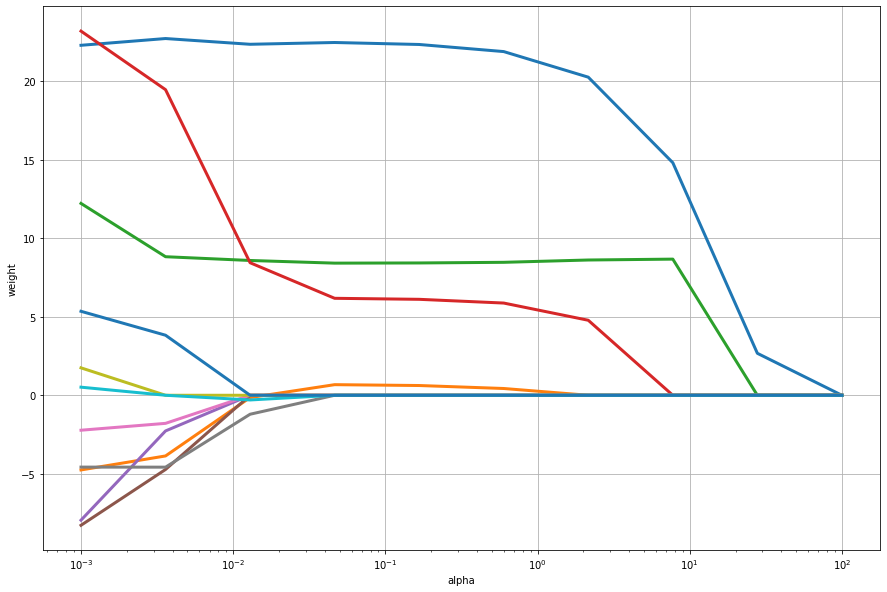

In [ ]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

## ElasticNet (L1+L2 регуляризация)

In [ ]:
alphas = list(np.logspace(-3, 5, 5))
models = []

In [ ]:
alphas

[0.001, 0.1, 10.0, 1000.0, 100000.0]

> Minimizes the objective function:<br>
$$\frac{1}{2 * n_{samples}} \cdot ||y - Xw||^2_2 + alpha * l1_{ratio} * ||w||_1 + 0.5 \cdot alpha * (1 - l1_{ratio}) * ||w||^2_2$$




> The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For
l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it
is an L1 penalty.  For 0 < l1_ratio < 1, the penalty is a
combination of L1 and L2.

In [ ]:
l1_ratio = list(np.linspace(0, 1, 5))
l1_ratio

[0.0, 0.25, 0.5, 0.75, 1.0]

In [ ]:
from sklearn.linear_model import ElasticNet, LinearRegression

for l1 in l1_ratio:
    for alpha in alphas:
        m_r = ElasticNet(max_iter=1000,
                         alpha=alpha,
                         l1_ratio=l1).fit(X_train, y_train)
        models.append(m_r)


models.append(LinearRegression().fit(X_train, y_train))

### Визуализация предсказаний

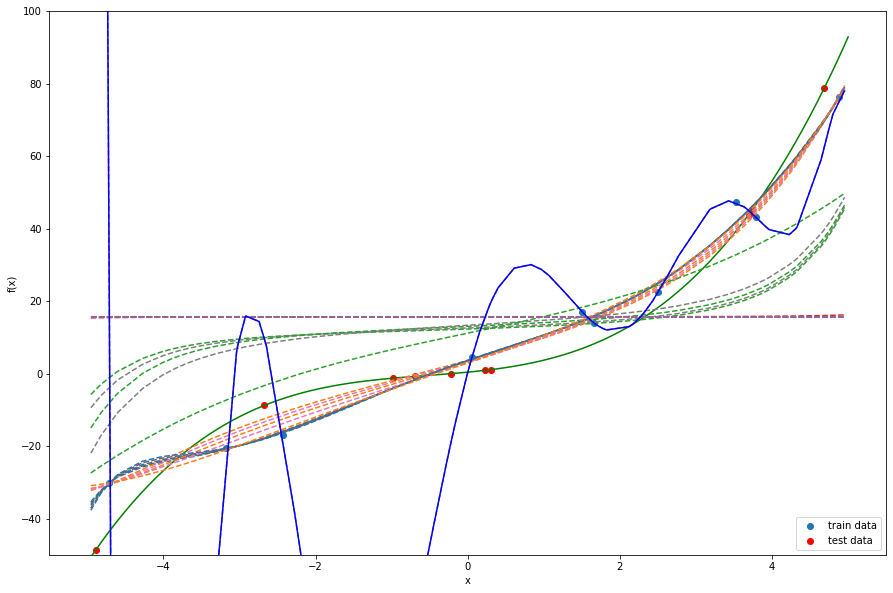

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(X, y, color='g')
plt.scatter(x_train, y_train, label='train data');
plt.scatter(x_test, y_test, label='test data', c='r')
plt.legend()

x_t = np.sort(np.random.uniform(-5, 5, 100)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for m in models:
    plt.plot(x_t, m.predict(X_t), '--')

plt.plot(x_t, models[-1].predict(X_t), 'b-')
plt.ylim(-50, 100);

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'l1_ratio': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, l1 in enumerate(l1_ratio):
    for j, alpha in enumerate(alphas):
        alpha = alphas[j]
        l1 = l1_ratio[i]
        m = models[i+j]
        scores = scores.append(
            {
                'alpha': alpha,
                'l1_ratio': l1,
                'train_r2': m.score(X_train, y_train),
                'test_r2': m.score(X_test, y_test)
            }, ignore_index=True
        )


scores

,alpha,l1_ratio,train_r2,test_r2
0,no,no,1.000000,-76.478993
1,0.001,0.0,0.993524,0.962130
2,0.1,0.0,0.985673,0.962193
3,10.0,0.0,0.505892,0.474395
4,1000.0,0.0,0.009741,-0.010146
5,100000.0,0.0,0.000098,-0.019099
6,0.001,0.25,0.985673,0.962193
7,0.1,0.25,0.505892,0.474395
8,10.0,0.25,0.009741,-0.010146
9,1000.0,0.25,0.000098,-0.019099


In [ ]:
scores.sort_values(['test_r2', 'train_r2'], ascending=False)

,alpha,l1_ratio,train_r2,test_r2
10,100000.0,0.25,0.993581,0.962593
14,1000.0,0.5,0.993581,0.962593
18,10.0,0.75,0.993581,0.962593
22,0.1,1.0,0.993581,0.962593
2,0.1,0.0,0.985673,0.962193
6,0.001,0.25,0.985673,0.962193
1,0.001,0.0,0.993524,0.962130
15,100000.0,0.5,0.988146,0.961745
19,1000.0,0.75,0.988146,0.961745
23,10.0,1.0,0.988146,0.961745


# Классификация

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           random_state=8)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
x_test

array([[-1.16520302,  0.66365187],
       [ 1.22744528,  1.24892355],
       [ 0.52957757,  0.0651761 ],
       [ 0.63338825,  0.29698435],
       [ 2.14693938, -2.51079642],
       [-1.58072521,  3.20358585],
       [-4.06692833,  2.07163149],
       [ 0.69403514,  0.06335816],
       [ 1.3566791 ,  1.57261964],
       [ 1.2484055 ,  0.84680147],
       [ 0.38417436, -1.83215307],
       [ 1.15751837,  2.31625834],
       [-1.04204845,  1.13369682],
       [-4.7071935 ,  1.83311927],
       [-0.94236389, -0.72782043],
       [ 2.59530913, -3.26386112],
       [-1.44560647,  0.29761702],
       [ 1.20430965,  1.81898799],
       [ 0.50399065, -0.74827449],
       [-1.10459728, -0.29627109]])

In [ ]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
colors = [plt.cm.Spectral(i) for i in np.linspace(1, 0, 2)]
colors

[(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0),
 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)]

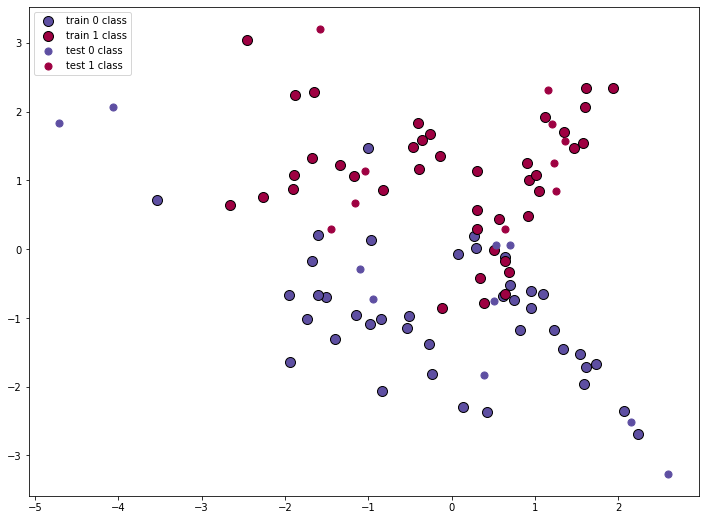

In [ ]:
plt.figure(figsize=(12,9))

s = 100
b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])

plt.legend([b1, b2, b3, b4],
           ["train 0 class", "train 1 class", "test 0 class", "test 1 class"],
           loc="upper left");

In [ ]:
x_train[:1]

array([[ 0.33385686, -0.41410363]])

In [ ]:
PolynomialFeatures(5, include_bias=False).fit_transform(x_train[:1])

array([[ 0.33385686, -0.41410363,  0.1114604 , -0.13825134,  0.17148182,
         0.03721182, -0.04615616,  0.05725038, -0.07101124,  0.01242342,
        -0.01540955,  0.01911343, -0.02370759,  0.02940601,  0.00414764,
        -0.00514458,  0.00638115, -0.00791494,  0.0098174 , -0.01217714]])

In [ ]:
pipe = make_pipeline(PolynomialFeatures(5, include_bias=False), 
                     StandardScaler())

pipe.fit(x_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [ ]:
X_train = pipe.transform(x_train)
X_test = pipe.transform(x_test)

X_train.shape

(80, 20)

## Ridge (L2 регуляризация)

In [ ]:
alphas = list(np.logspace(-7, 4, 10))
models = []
coefs = []

In [ ]:
alphas

[1e-07,
 1.6681005372000591e-06,
 2.782559402207126e-05,
 0.0004641588833612782,
 0.007742636826811277,
 0.12915496650148853,
 2.1544346900318865,
 35.9381366380464,
 599.4842503189421,
 10000.0]

> Warning The choice of the algorithm depends on the penalty chosen:<br> Supported penalties by solver:<br>
‘newton-cg’ - [‘l2’, ‘none’]<br>
‘lbfgs’ - [‘l2’, ‘none’]<br>
‘liblinear’ - [‘l1’, ‘l2’]<br>
‘sag’ - [‘l2’, ‘none’]<br>
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [ ]:
from sklearn.linear_model import LogisticRegression

for alpha in alphas:
    m_r = LogisticRegression(penalty='l2',
                             C=1/alpha,
                             solver='liblinear').fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LogisticRegression(penalty='none').fit(X_train, y_train))

In [ ]:
coefs[0].shape

(1, 20)

### Визуализация предсказаний

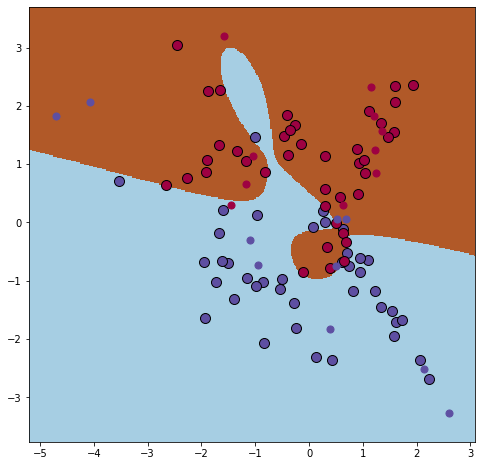

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]
X_t = pipe.transform(x_t.copy())

Z = models[-1].predict(X_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_acc': models[-1].score(X_train, y_train),
            'test_acc': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_acc': m.score(X_train, y_train),
            'test_acc': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_acc,test_acc
0,no,0.9625,0.70
1,0.0,0.9750,0.70
2,0.000002,0.9625,0.75
3,0.000028,0.9625,0.70
4,0.000464,0.9375,0.70
5,0.007743,0.9000,0.60
6,0.129155,0.8750,0.75
7,2.154435,0.8750,0.80
8,35.938137,0.8750,0.75
9,599.48425,0.8875,0.85


In [ ]:
best_ind = scores.sort_values(['test_acc', 'train_acc']).index[-1]
best_ind

9

In [ ]:
import matplotlib

color_map = plt.cm.get_cmap('magma', len(models))
colors_line = []

for i in np.linspace(0, 1, len(models)):
    colors_line.append(matplotlib.colors.to_hex(color_map(i)))

colors_line

['#000004',
 '#140e36',
 '#3b0f70',
 '#641a80',
 '#8c2981',
 '#b73779',
 '#de4968',
 '#f7705c',
 '#fe9f6d',
 '#fecf92',
 '#fcfdbf']

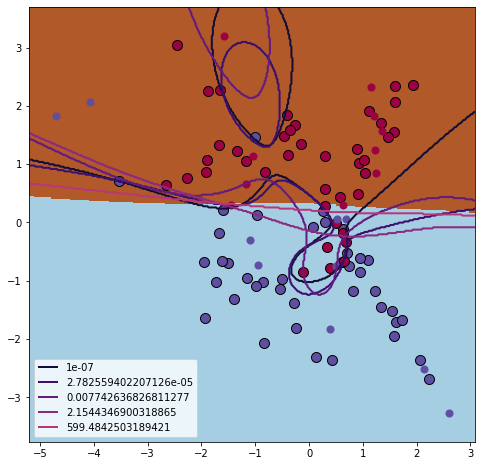

In [ ]:
x_t = np.c_[xx.ravel(),yy.ravel()]
X_t = pipe.transform(x_t.copy())

plt.figure(1, figsize=(8,8))
legend = {}
j = 0
for i, m in enumerate(models[:-1]):
    if i % 2 == 0:
        j += 1
        Z = m.predict(X_t)
        Z = Z.reshape(xx.shape)
        legend[alphas[i]] = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors=colors_line[j])


b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])


Z = models[best_ind].predict(X_t)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired, zorder=-1)


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

legend1_values_list = tuple([i.collections[0] for i in list(legend.values())])
legend1_keys_list = tuple(legend.keys())

plt.legend(legend1_values_list,
           legend1_keys_list);

### Визуализация весов

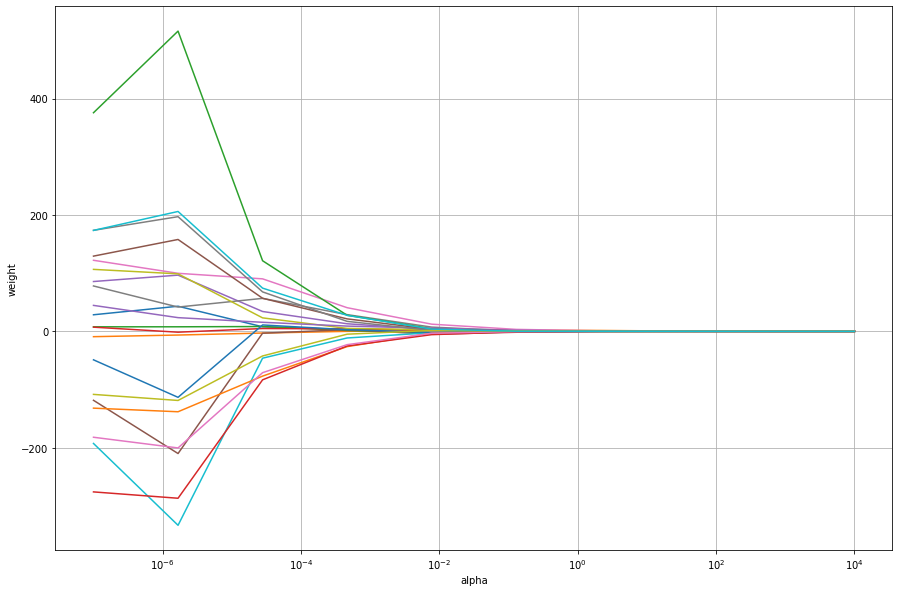

In [ ]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

## Lasso (L1 регуляризация)

In [ ]:
alphas = list(np.logspace(-3, 2, 10))
models = []
coefs = []

In [ ]:
alphas

[0.001,
 0.003593813663804626,
 0.01291549665014884,
 0.046415888336127795,
 0.1668100537200059,
 0.5994842503189409,
 2.1544346900318843,
 7.742636826811277,
 27.825594022071257,
 100.0]

> Warning The choice of the algorithm depends on the penalty chosen:<br> Supported penalties by solver:<br>
‘newton-cg’ - [‘l2’, ‘none’]<br>
‘lbfgs’ - [‘l2’, ‘none’]<br>
‘liblinear’ - [‘l1’, ‘l2’]<br>
‘sag’ - [‘l2’, ‘none’]<br>
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [ ]:
for alpha in alphas:
    m_r = LogisticRegression(max_iter=1000,
                             penalty='l1',
                             C=1/alpha,
                             solver='liblinear').fit(X_train, y_train)
    models.append(m_r)
    coefs.append(m_r.coef_)

models.append(LogisticRegression(max_iter=1000, penalty='none').fit(X_train, y_train))

### Визуализация предсказаний

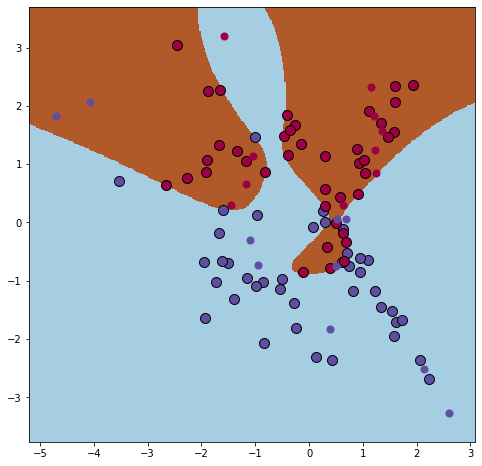

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]
X_t = pipe.transform(x_t.copy())

Z = models[-1].predict(X_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'train_acc': models[-1].score(X_train, y_train),
            'test_acc': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_acc': m.score(X_train, y_train),
            'test_acc': m.score(X_test, y_test)
        }, ignore_index=True
    )


scores

,alpha,train_acc,test_acc
0,no,0.9750,0.75
1,0.001,0.9500,0.70
2,0.003594,0.9500,0.70
3,0.012915,0.9375,0.70
4,0.046416,0.9125,0.65
5,0.16681,0.8875,0.75
6,0.599484,0.8750,0.75
7,2.154435,0.8625,0.85
8,7.742637,0.8500,0.80
9,27.825594,0.8500,0.80


In [ ]:
best_ind = scores.sort_values(['test_acc', 'train_acc']).index[-1]
best_ind

7

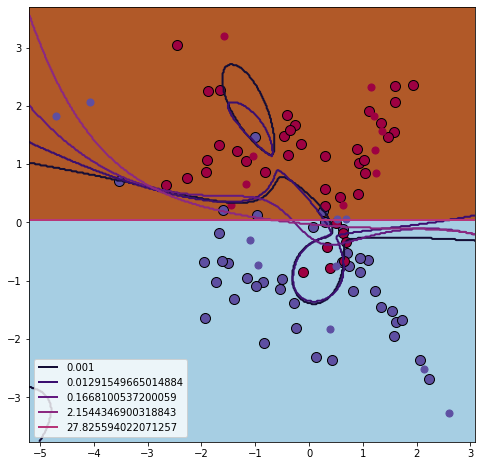

In [ ]:
x_t = np.c_[xx.ravel(),yy.ravel()]
X_t = pipe.transform(x_t.copy())

plt.figure(1, figsize=(8,8))
legend = {}
j = 0
for i, m in enumerate(models[:-1]):
    if i % 2 == 0:
        j += 1
        Z = m.predict(X_t)
        Z = Z.reshape(xx.shape)
        legend[alphas[i]] = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors=colors_line[j])


b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])


Z = models[best_ind].predict(X_t)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired, zorder=-1)


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

legend1_values_list = tuple([i.collections[0] for i in list(legend.values())])
legend1_keys_list = tuple(legend.keys())

plt.legend(legend1_values_list,
           legend1_keys_list);

### Визуализация весов

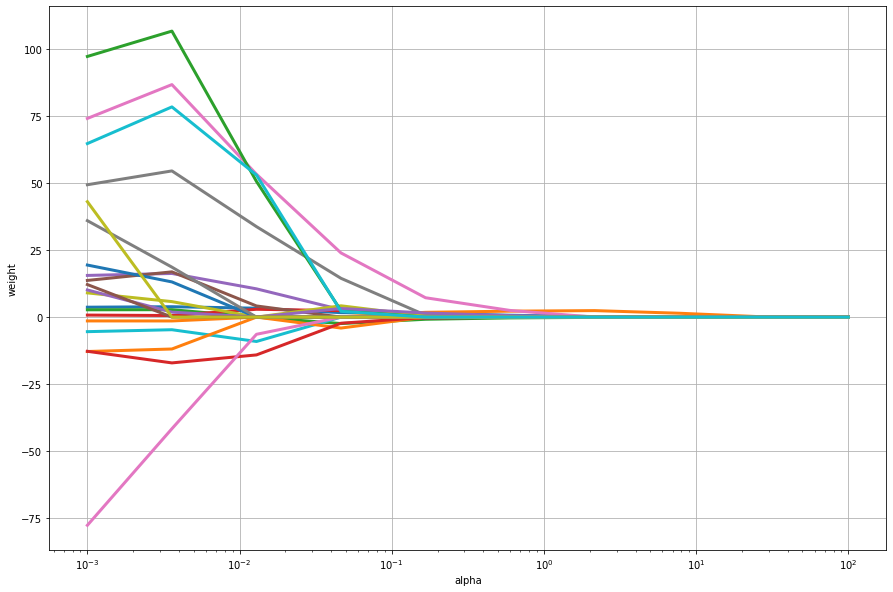

In [ ]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight');

## ElasticNet (L1+L2 регуляризация)

In [ ]:
alphas = list(np.logspace(-3, 5, 5))
models = []

In [ ]:
alphas

[0.001, 0.1, 10.0, 1000.0, 100000.0]

> Minimizes the objective function:<br>
$$\frac{1}{2 * n_{samples}} \cdot ||y - Xw||^2_2 + alpha * l1_{ratio} * ||w||_1 + 0.5 \cdot alpha * (1 - l1_{ratio}) * ||w||^2_2$$




> The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For
l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it
is an L1 penalty.  For 0 < l1_ratio < 1, the penalty is a
combination of L1 and L2.

In [ ]:
l1_ratio = list(np.linspace(0, 1, 5))
l1_ratio

[0.0, 0.25, 0.5, 0.75, 1.0]

> Warning The choice of the algorithm depends on the penalty chosen:<br> Supported penalties by solver:<br>
‘newton-cg’ - [‘l2’, ‘none’]<br>
‘lbfgs’ - [‘l2’, ‘none’]<br>
‘liblinear’ - [‘l1’, ‘l2’]<br>
‘sag’ - [‘l2’, ‘none’]<br>
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

In [ ]:
from sklearn.linear_model import LogisticRegression

for l1 in l1_ratio:
    for alpha in alphas:
        m_r = LogisticRegression(max_iter=1000,
                                 penalty='elasticnet',
                                 C=1/alpha,
                                 solver='saga',
                                 l1_ratio=l1).fit(X_train, y_train)
        models.append(m_r)
        coefs.append(m_r.coef_)

models.append(LogisticRegression(max_iter=1000, penalty='none').fit(X_train, y_train))

### Визуализация предсказаний

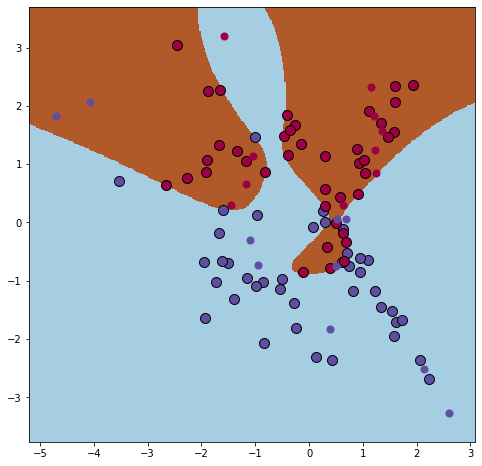

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]
X_t = pipe.transform(x_t.copy())

Z = models[-1].predict(X_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

b1 = plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], s=s, color=colors[0], edgecolors='k')
b2 = plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], s=s, color=colors[1], edgecolors='k')

b3 = plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], s=s//2, color=colors[0])
b4 = plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], s=s//2, color=colors[1])


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

In [ ]:
import pandas as pd

scores = pd.DataFrame()
scores = scores.append(
        {
            'alpha': 'no',
            'l1_ratio': 'no',
            'train_r2': models[-1].score(X_train, y_train),
            'test_r2': models[-1].score(X_test, y_test)
        }, ignore_index=True
    )

for i, l1 in enumerate(l1_ratio):
    for j, alpha in enumerate(alphas):
        alpha = alphas[j]
        l1 = l1_ratio[i]
        m = models[i+j]
        scores = scores.append(
            {
                'alpha': alpha,
                'l1_ratio': l1,
                'train_r2': m.score(X_train, y_train),
                'test_r2': m.score(X_test, y_test)
            }, ignore_index=True
        )


scores

,alpha,l1_ratio,train_r2,test_r2
0,no,no,0.9750,0.75
1,0.001,0.0,0.8750,0.75
2,0.1,0.0,0.8750,0.75
3,10.0,0.0,0.8375,0.80
4,1000.0,0.0,0.8375,0.80
5,100000.0,0.0,0.5250,0.60
6,0.001,0.25,0.8750,0.75
7,0.1,0.25,0.8375,0.80
8,10.0,0.25,0.8375,0.80
9,1000.0,0.25,0.5250,0.60


In [ ]:
best_ind = scores.sort_values(['test_r2', 'train_r2']).index[-1]
best_ind

24

# Что сегодня узнали

1. Регуляризация для задачи регрессии с помощью Sklearn
    - Ridge (L2 регуляризация)
    - Lasso (L1 регуляризация)
    - Elastic Net (L1 + L2)
2. Регуляризация для задачи классификации с помощью Sklearn
    - L2 регуляризация
    - L1 регуляризация
    - Elastic Net (L1 + L2)
3. Визуализация весов при изменении коэффициента регуляризации
4. Визуализация разделяющей плоскости для классификации


Муррр ♥